**Names:** David Andrejsin, Sakchham Sangroula(Sakchham10), Milan Bista, Unique Karanjit, Shimon Bhandari

**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  

**Assignment:** Residency Weekend Project

# **Deliverable 1:** Data Collection, Cleaning, and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Dataset ---
# URL of the CSV file for the Titanic training dataset
url_train = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLVnuw_-hrfeu3nPoNRep6njd9dE38TsbuMmjtWfEuYDk9cWD6zm1H6Ol0DLrwrWFoTMV5FrbIYX_S/pub?output=csv'
url_test = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT09-OTs7c70zIAULtE8ynNBGH91qnz0Dk34UQ3Q9IvLCYBaPGf7zxP9Q5K81GfaTJikdktmBFROJZI/pub?output=csv'
# Load the dataset using Pandas
try:
    df_train = pd.read_csv(url_train)
    df_test = pd.read_csv(url_test)
    print("Dataset loaded successfully.")
    print("Initial shape of the dataset:", df_train.shape)
    print("Initial shape of the dataset:", df_test.shape)
except Exception as e:
    print(f"Failed to load dataset. Error: {e}")
    exit()

Dataset loaded successfully.
Initial shape of the dataset: (891, 12)
Initial shape of the dataset: (418, 11)


In [2]:
# Overview of the training data
print("Train dataset shape:", df_train.shape)
print()
print("Test dataset shape:", df_test.shape)
print()
print("Train Dataset Info")
display(df_train.info())
print()
print("Train Dataset Head")
display(df_train.head())
print()
print("Train Dataset Describe")
display(df_train.describe())
print()


# Check missing values
print("Missing Values")
display(df_train.isnull().sum())


Train dataset shape: (891, 12)

Test dataset shape: (418, 11)

Train Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Train Dataset Head


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Train Dataset Describe


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# --- 3. Perform Data Cleaning ---

# Handle missing values
# Impute 'age' with the median
age_median = df_train['Age'].median()
df_train['Age'].fillna(age_median, inplace=True)
print(f"\nMissing 'age' values imputed with median: {age_median}")

# Drop the 'cabin' column due to too many missing values
df_train.drop(columns=['Cabin'], inplace=True)
print("Dropped 'cabin' column.")

# Fill 'embarked' with the mode (most frequent value)
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Missing 'embarked' values filled with mode: {embarked_mode}")

# Standardize categorical entries
df_train['Sex'] = df_train['Sex'].str.strip().str.lower()
df_train['Embarked'] = df_train['Embarked'].str.strip().str.upper()

# Check missing values again
print("Missing Values")
display(df_train.isnull().sum())


Missing 'age' values imputed with median: 28.0
Dropped 'cabin' column.
Missing 'embarked' values filled with mode: S
Missing Values


/tmp/ipython-input-3-3307649993.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-3-3307649993.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Check for duplicates (none are expected in this dataset)
duplicates = df_train.duplicated().sum()
if duplicates == 0:
    print("No duplicate rows found.")
else:
    df_train.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicate rows.")

print("\nData cleaning complete. Final shape:", df_train.shape)

No duplicate rows found.

Data cleaning complete. Final shape: (891, 11)


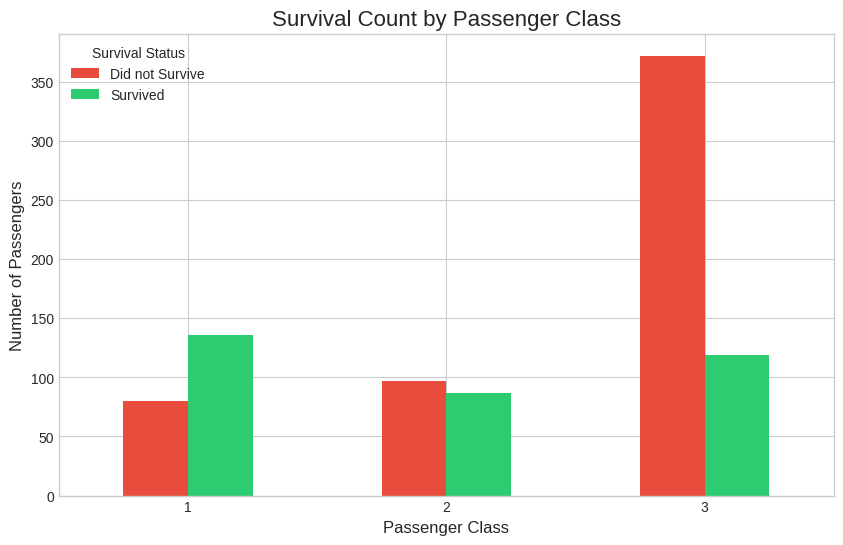

In [5]:

# --- 4. Conduct Exploratory Data Analysis (EDA) ---

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Visualization 1: Survival Rate by Passenger Class (pclass)
# Create a contingency table of survival counts by class
survival_by_class = df_train.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)
survival_by_class = survival_by_class.rename(columns={0: 'Did not Survive', 1: 'Survived'})

# Plotting the grouped bar chart
ax1 = survival_by_class.plot(kind='bar',
                            figsize=(10, 6),
                            color=['#e74c3c', '#2ecc71'],
                            rot=0)

plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status')
plt.show()



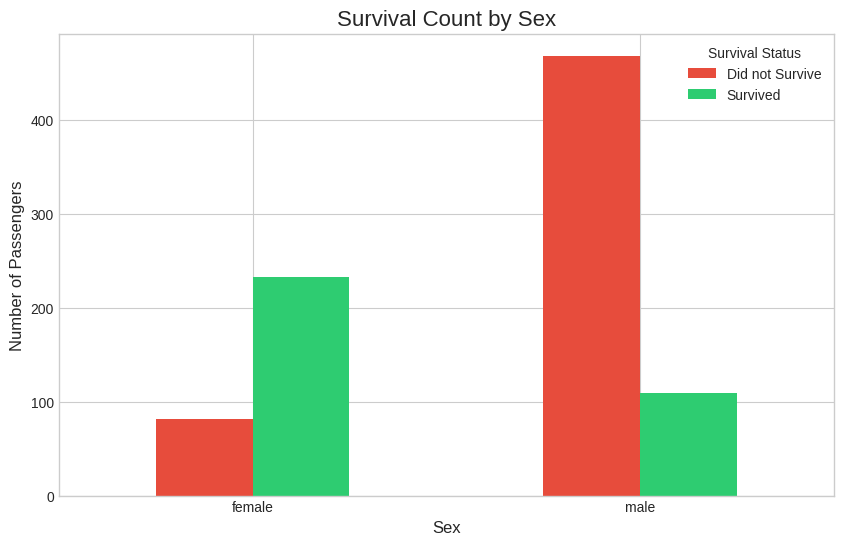


EDA complete. Insights are derived from the visualizations.
Key insights show that passenger class and sex were strong factors in survival.


In [6]:
# Visualization 2: Survival Rate by Sex
# Create a contingency table of survival counts by sex
survival_by_sex = df_train.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
survival_by_sex = survival_by_sex.rename(columns={0: 'Did not Survive', 1: 'Survived'})

# Plotting the grouped bar chart
ax2 = survival_by_sex.plot(kind='bar',
                           figsize=(10, 6),
                           color=['#e74c3c', '#2ecc71'],
                           rot=0)

plt.title('Survival Count by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status')
plt.show()


# --- 5. Provide Insights ---
print("\nEDA complete. Insights are derived from the visualizations.")
print("Key insights show that passenger class and sex were strong factors in survival.")

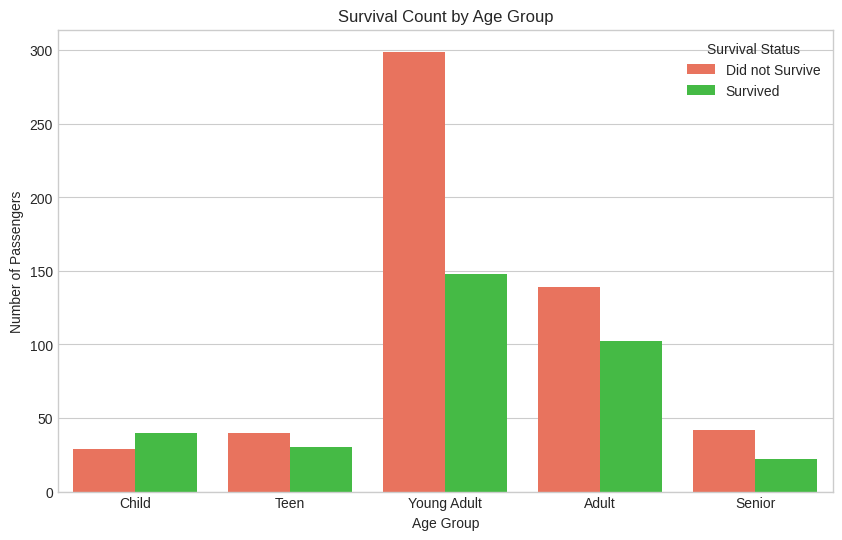

In [7]:
# Create age bins
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 30, 50, 100],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='AgeGroup', hue='Survived', palette={0: 'tomato', 1: 'limegreen'})

plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(title='Survival Status', labels=['Did not Survive', 'Survived'])
plt.show()



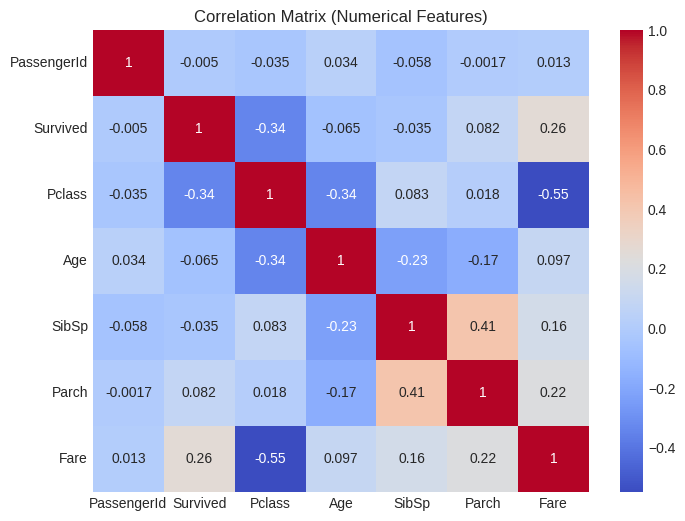

        Survived
Sex             
female  0.742038
male    0.188908
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [8]:
# Explore Correlation to Survival Rate

plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

print(df_train.pivot_table(index='Sex', values='Survived', aggfunc='mean'))
print(df_train.pivot_table(index='Embarked', values='Survived', aggfunc='mean'))



In [9]:
# Save for submission use later
test_passenger_ids = df_test['PassengerId']
train_passenger_ids = df_train['PassengerId']


# Drop irrelevant columns from both train and test datasets
columns_to_drop = ['PassengerId', 'Name', 'Ticket']

df_train_cleaned = df_train.drop(columns=columns_to_drop)
df_test_cleaned = df_test.drop(columns=columns_to_drop)

display(df_train_cleaned.head())
display(df_test_cleaned.head())



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


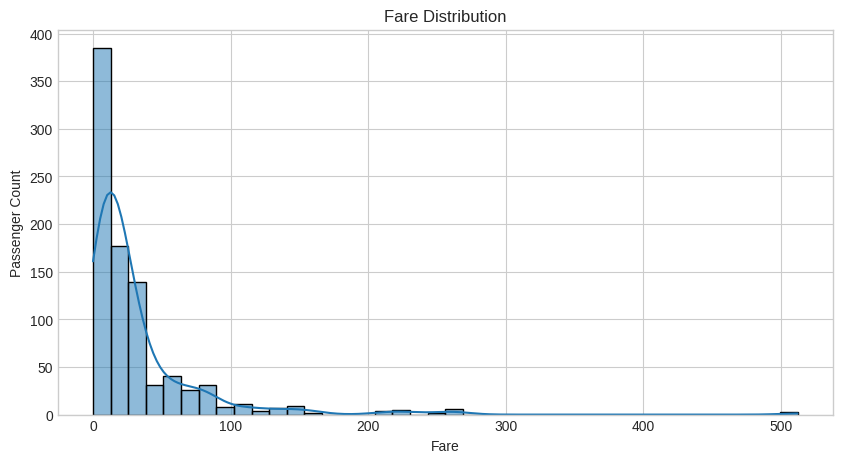

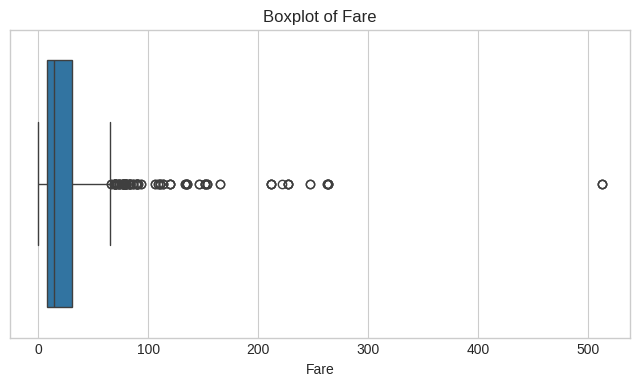

In [10]:
# Visualizing Fare price

plt.figure(figsize=(10, 5))
sns.histplot(df_train['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Passenger Count")
plt.show()


# Outlier Detection for Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_train['Fare'])
plt.title("Boxplot of Fare")
plt.show()


# **Deliverable 2:** Regression Modeling and Performance Evaluation

In [11]:
# Relevant imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [12]:
# Recreate FamilySize
for df in [df_train_cleaned, df_test_cleaned]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Define features and target
target = 'Fare'
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']

X = df_train_cleaned[feature_cols]
y = df_train_cleaned[target]


In [13]:
# Define numerical and categorical columns
num_cols = ['Age', 'FamilySize', 'Pclass']
cat_cols = ['Sex', 'Embarked']

# Column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [14]:
# ------------------------------
# 1.  PRE‑PROCESSING set‑up
# ------------------------------
num_cols = ['Age', 'FamilySize', 'Pclass']
cat_cols = ['Sex', 'Embarked']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# ------------------------------
# 2.  DEFINE MODELS
# ------------------------------
models = {
    'Linear' : LinearRegression(),
    'Ridge'  : RidgeCV(alphas=[0.1, 1.0, 2.5, 5.0, 7.5, 10.0, 20.0, 50.0]),
    'Lasso'  : LassoCV(alphas=[0.1, 1.0, 2.5, 5.0, 7.5, 10.0, 20.0, 50.0], max_iter=5000)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

# ------------------------------
# 3.  LOOP THROUGH MODELS
# ------------------------------
for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('reg' , model)
    ])

    # --- Cross‑validated metrics ---
    mse  = -cross_val_score(pipe, X, y, scoring='neg_mean_squared_error', cv=cv).mean()
    rmse = np.sqrt(mse)
    r2   =  cross_val_score(pipe, X, y, scoring='r2',  cv=cv).mean()

    # --- Fit once on full data to expose best alpha, if available ---
    pipe.fit(X, y)
    best_alpha = getattr(pipe.named_steps['reg'], 'alpha_', 'n/a')

    print(f"{name}  |  Best α: {best_alpha}")

    results.append({
        'Model': name,
        'Best α': best_alpha,
        'R²': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4)
    })

# ------------------------------
# 4.  DISPLAY RESULTS
# ------------------------------
pd.DataFrame(results).sort_values('R²', ascending=False)

Linear  |  Best α: n/a
Ridge  |  Best α: 20.0
Lasso  |  Best α: 0.1


,Model,Best α,R²,MSE,RMSE
1,Ridge,20.0,0.4249,1543.2875,39.2847
0,Linear,n/a,0.4216,1546.6397,39.3273
2,Lasso,0.1,0.4190,1553.1207,39.4097


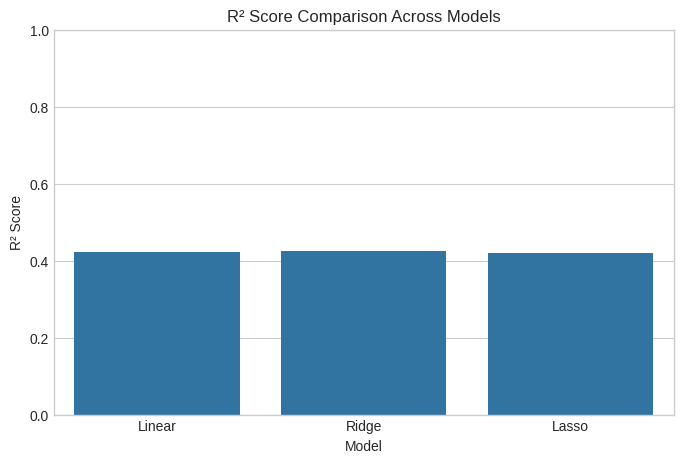

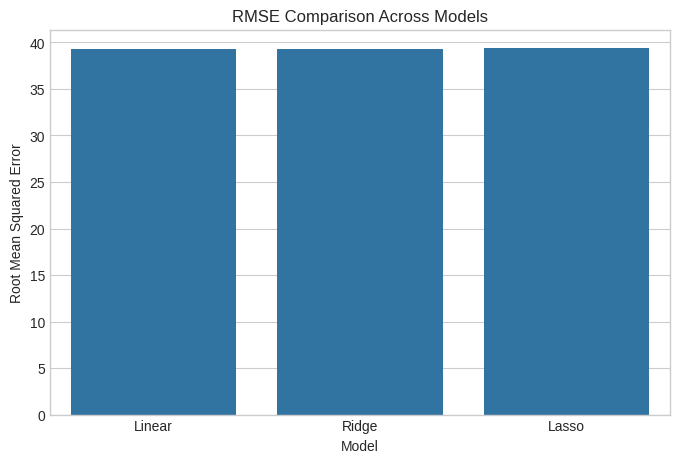

In [15]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot R² for each model
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='R²')
plt.title('R² Score Comparison Across Models')
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.show()

# Plot RMSE for each model
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('RMSE Comparison Across Models')
plt.ylabel('Root Mean Squared Error')
plt.show()


# **Deliverable 3:** Classification, Clustering, and Pattern Mining

In [16]:
# Relevant Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    accuracy_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [17]:
# Target and features
X = df_train_cleaned[['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch']]
X['FamilySize'] = df_train_cleaned['SibSp'] + df_train_cleaned['Parch'] + 1
y = df_train_cleaned['Survived']

# Define columns
num_cols = ['Age', 'SibSp', 'Parch', 'FamilySize', 'Pclass']
cat_cols = ['Sex', 'Embarked']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Decision Tree pipeline
dt_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# k-NN pipeline
knn_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', KNeighborsClassifier())
])


/tmp/ipython-input-17-4028340057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FamilySize'] = df_train_cleaned['SibSp'] + df_train_cleaned['Parch'] + 1


In [18]:
param_grid = {
    'clf__max_depth': [3, 5, 7, 10, None],
    'clf__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_


Best Decision Tree Params: {'clf__max_depth': 5, 'clf__min_samples_split': 10}


Decision Tree - Accuracy: 0.7709, F1 Score: 0.6435
k-NN - Accuracy: 0.7374, F1 Score: 0.6667


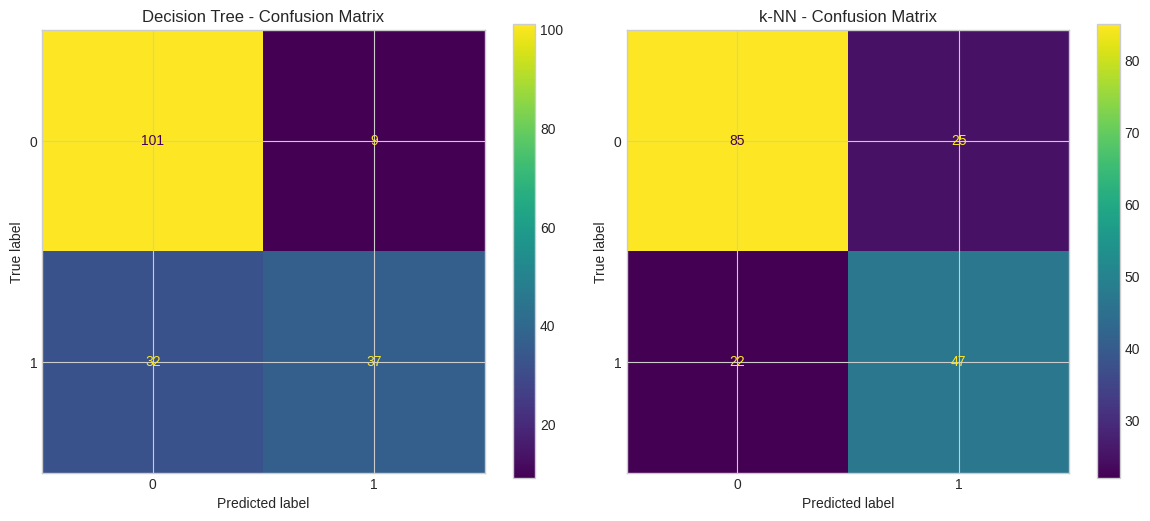

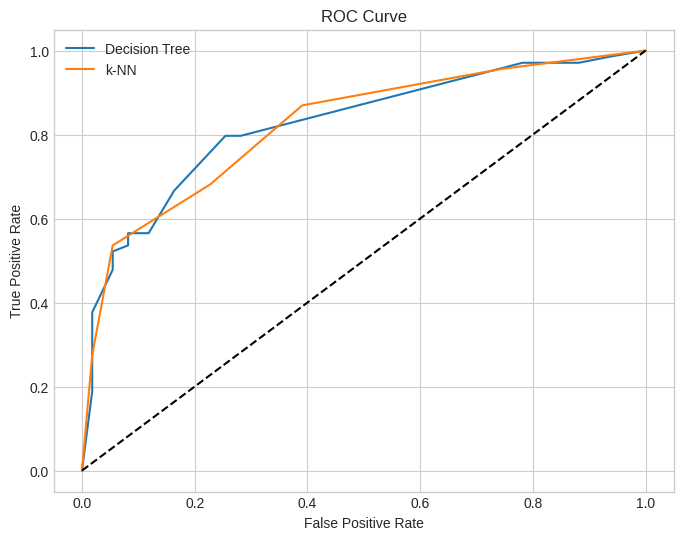

In [19]:
# Train both
best_dt_model.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train)

# Predictions
dt_preds = best_dt_model.predict(X_test)
knn_preds = knn_pipe.predict(X_test)

# Probabilities for ROC
dt_probs = best_dt_model.predict_proba(X_test)[:, 1]
knn_probs = knn_pipe.predict_proba(X_test)[:, 1]

# Evaluation metrics
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    return acc, f1

evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("k-NN", y_test, knn_preds)

# Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, dt_preds, ax=axs[0])
axs[0].set_title("Decision Tree - Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, knn_preds, ax=axs[1])
axs[1].set_title("k-NN - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='k-NN')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
